# Import

In [1]:
#First we import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
#we load the data set
df = pd.read_csv("seismic-bumps.csv")

In [3]:
#We show the dataset
df

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,a,a,N,15180,48,-72,-72,a,0,0,0,0,0,0,0,0,0,0,0
1,a,a,N,14720,33,-70,-79,a,1,0,1,0,0,0,0,0,2000,2000,0
2,a,a,N,8050,30,-81,-78,a,0,0,0,0,0,0,0,0,0,0,0
3,a,a,N,28820,171,-23,40,a,1,0,1,0,0,0,0,0,3000,3000,0
4,a,a,N,12640,57,-63,-52,a,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2579,b,a,W,81410,785,432,151,b,0,0,0,0,0,0,0,0,0,0,0
2580,b,a,W,42110,555,213,118,a,0,0,0,0,0,0,0,0,0,0,0
2581,b,a,W,26960,540,101,112,a,0,0,0,0,0,0,0,0,0,0,0
2582,a,a,W,16130,322,2,2,a,0,0,0,0,0,0,0,0,0,0,0


In [4]:
#An array of the column names
df.columns

Index(['seismic', 'seismoacoustic', 'shift', 'genergy', 'gpuls', 'gdenergy',
       'gdpuls', 'hazard', 'nbumps', 'nbumps2', 'nbumps3', 'nbumps4',
       'nbumps5', 'nbumps6', 'nbumps7', 'nbumps89', 'energy', 'maxenergy',
       'class'],
      dtype='object')

In [59]:
# convert categorical features in numerical values ('a', 'b', 'c', 'd' --> 1, 2, 3, 4)

# change the type of the column in categorical
df.seismic = pd.Categorical(df.seismic)
df.seismoacoustic = pd.Categorical(df.seismoacoustic)
df['shift'] = pd.Categorical(df['shift'])
df.hazard = pd.Categorical(df.hazard)

# convert category in numerical value
df.seismic = df.seismic.cat.codes
df.seismoacoustic = df.seismoacoustic.cat.codes
df['shift'] = df['shift'].cat.codes
df.hazard = df.hazard.cat.codes

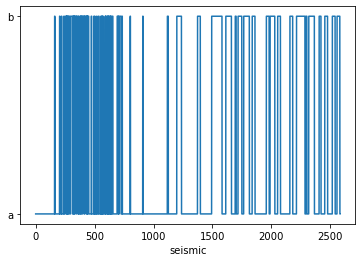

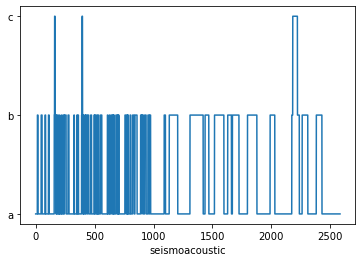

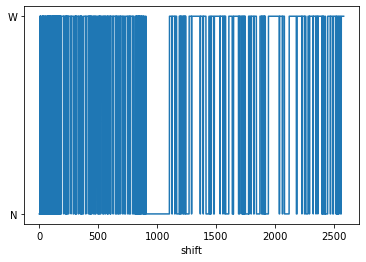

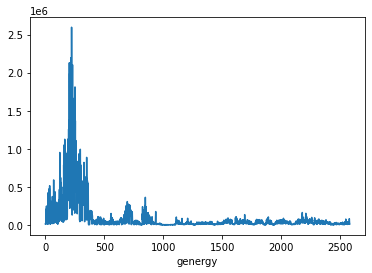

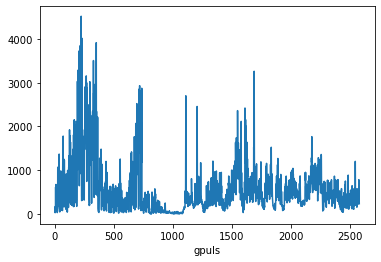

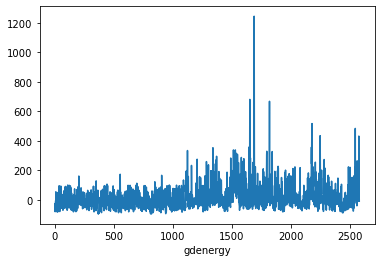

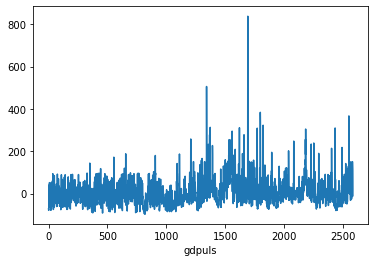

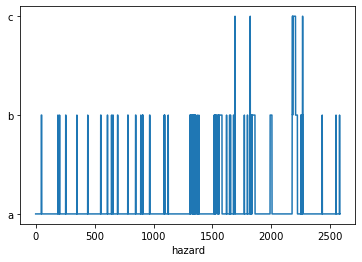

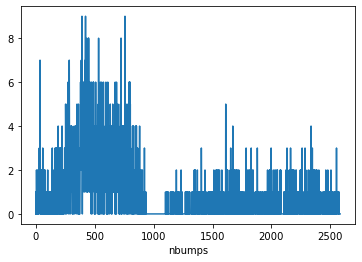

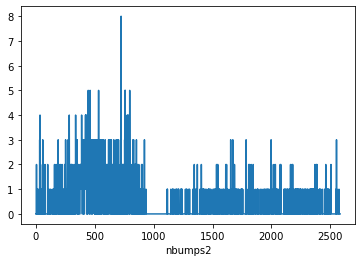

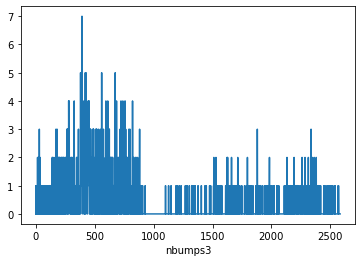

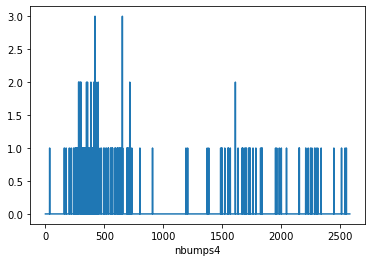

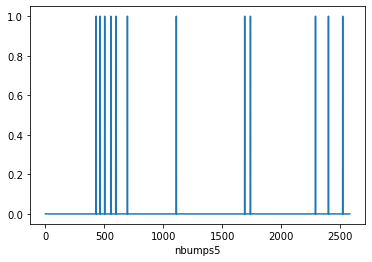

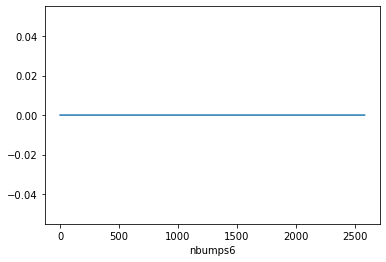

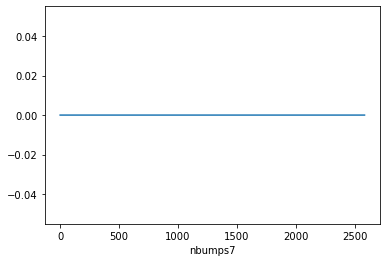

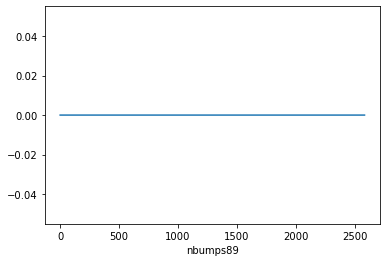

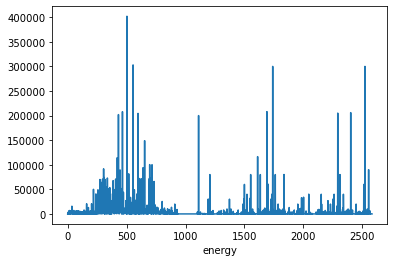

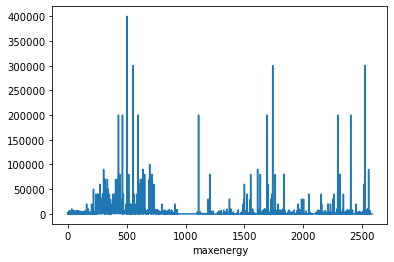

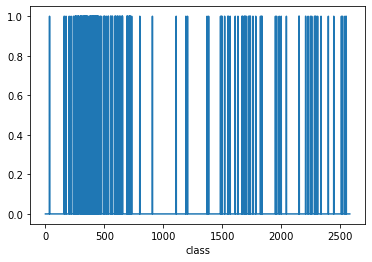

In [6]:
#we make a plot for every columns to visualize the data and see possible correlations
for column in df.head():
    plt.plot(df[column])
    plt.xlabel(column)
    plt.show()

# Categorical variables

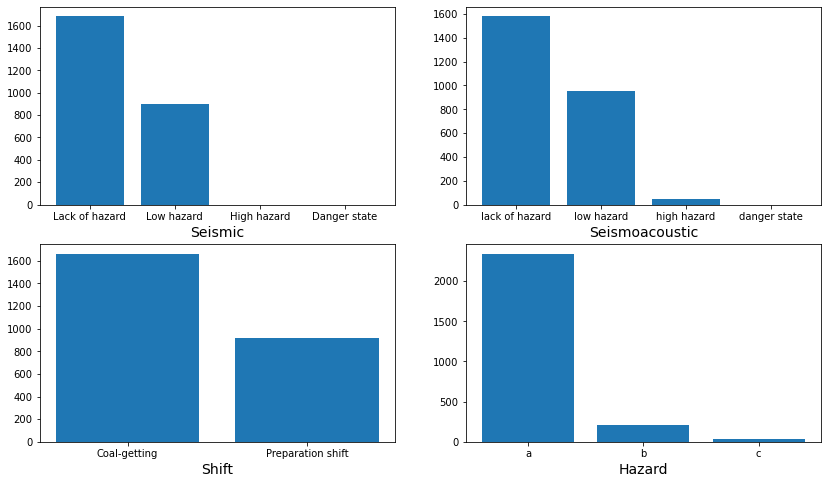

In [7]:
#Making bar plots for categorical variables (seismic, seismoacoustic, shift, ghazard)
fig, ax = plt.subplots(2,2, figsize=(14,8))
ax[0,0].bar(["Lack of hazard","Low hazard","High hazard","Danger state"],[(df["seismic"]=='a').sum(),(df["seismic"]=='b').sum(),(df["seismic"]=='c').sum(),(df["seismic"]=='d').sum()])
ax[0,0].set_xlabel("Seismic",fontsize=14)
ax[0,1].bar(["lack of hazard","low hazard","high hazard","danger state"],[(df["seismoacoustic"]=='a').sum(),(df["seismoacoustic"]=='b').sum(),(df["seismoacoustic"]=='c').sum(),(df["seismoacoustic"]=='d').sum()])
ax[0,1].set_xlabel("Seismoacoustic",fontsize=14)
ax[1,0].bar(["Coal-getting","Preparation shift"],[(df["shift"]=='W').sum(),(df["shift"]=='N').sum()])
ax[1,0].set_xlabel("Shift",fontsize=14)
ax[1,1].bar(["a","b","c"],[(df["hazard"]=='a').sum(),(df["hazard"]=='b').sum(),(df["hazard"]=='c').sum()])
ax[1,1].set_xlabel("Hazard",fontsize=14)
plt.show()

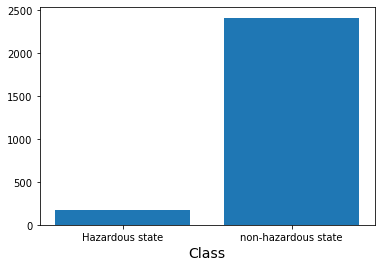

In [8]:
#class column. class: the decision attribute - '1' means that high energy seismic bump occurred in the next shift
#('hazardous state'), '0' means that no high energy seismic bumps occurred in the next shift ('non-hazardous state').

plt.bar(["Hazardous state","non-hazardous state"],[(df["class"]==1).sum(),(df["class"]==0).sum()])
plt.xlabel("Class", fontsize=14)
plt.show()

Text(0, 0.5, 'count')

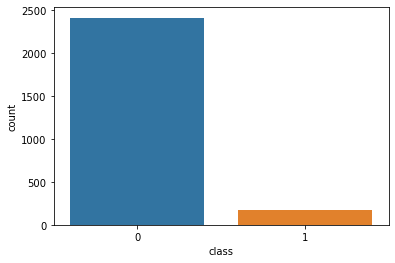

In [9]:
#quello sopra si puo fare anche con sns.countplot
sns.countplot(x='class', data=df)
plt.xlabel('class')
plt.ylabel('count')

To understand if in categorical features there exists a relationship bias between any of them and the label categories,I constructed contingency tables using pandas.crosstab function and assessed the ratios and proportions of the content of each category in categorical features versus the class labels to determine if there is a bias.

In [10]:
pd.crosstab(df['seismoacoustic'], df['class'], colnames=['class'])

class,0,1
seismoacoustic,,
a,1479,101
b,890,66
c,45,3


The features — “seismic” and “shift” contained some distribution bias. The category ‘b’ in ‘seismic’ feature contains a greater fraction of hazardous seismic bumps while that of “shift”’s category “W” contains more seismic bumps than the category “N”. 

In [11]:
pd.crosstab(df['seismic'], df['class'], colnames=['class']) 

class,0,1
seismic,,
a,1599,83
b,815,87


In [12]:
pd.crosstab(df['shift'], df['class'], colnames=['class'])

class,0,1
shift,,
N,904,17
W,1510,153


# Numerical variables

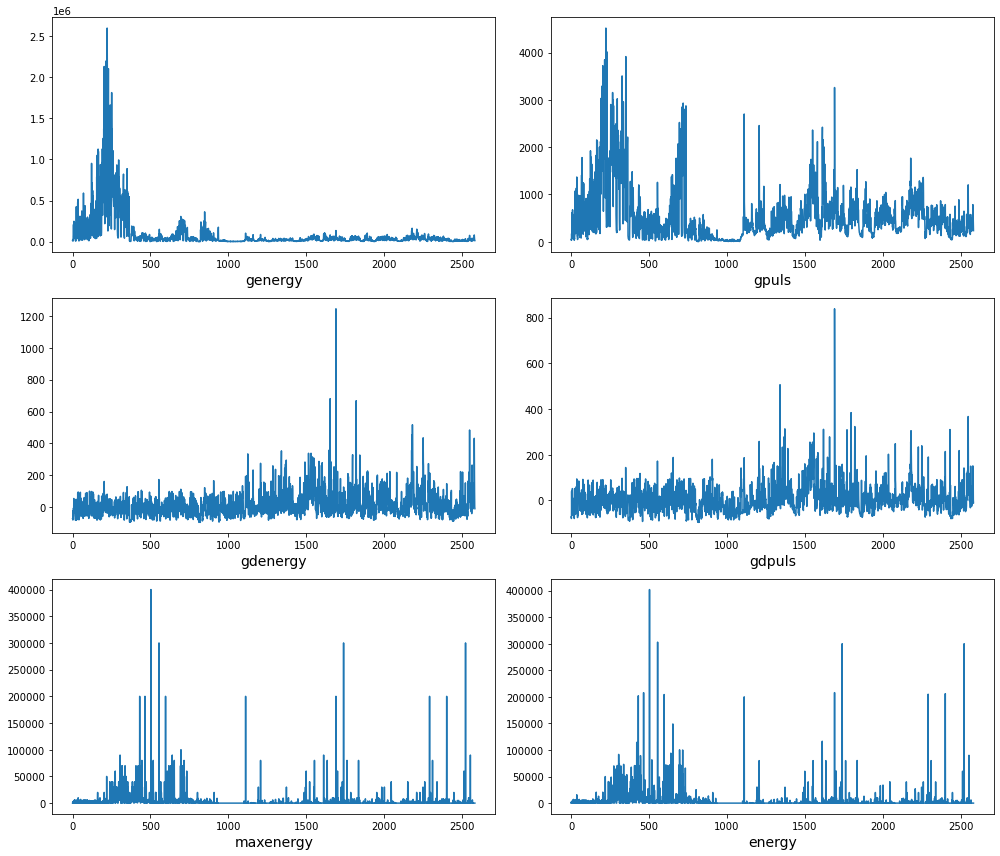

In [13]:
# making histogram plots for numerical variables (genergy, gpuls, gdenergy, gdpuls, energy, maxenergy)
fig, ax = plt.subplots(3,2, figsize=(14,12))

ax[0,0].plot(df["genergy"])
ax[0,0].set_xlabel("genergy",fontsize=14)
ax[0,1].plot(df["gpuls"])
ax[0,1].set_xlabel("gpuls",fontsize=14)
ax[1,0].plot(df["gdenergy"])
ax[1,0].set_xlabel("gdenergy",fontsize=14)
ax[1,1].plot(df["gdpuls"])
ax[1,1].set_xlabel("gdpuls",fontsize=14)
ax[2,1].plot(df["energy"])
ax[2,1].set_xlabel("energy",fontsize=14)
ax[2,0].plot(df["maxenergy"])
ax[2,0].set_xlabel("maxenergy",fontsize=14)

fig.tight_layout()
plt.show()

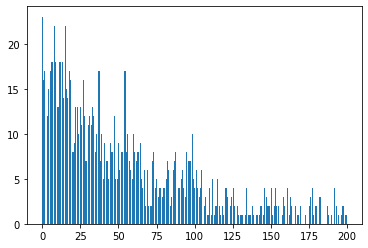

In [14]:
plt.hist(df["gdenergy"], bins=np.arange(0,200,0.71))
plt.show()

# Discrete variables

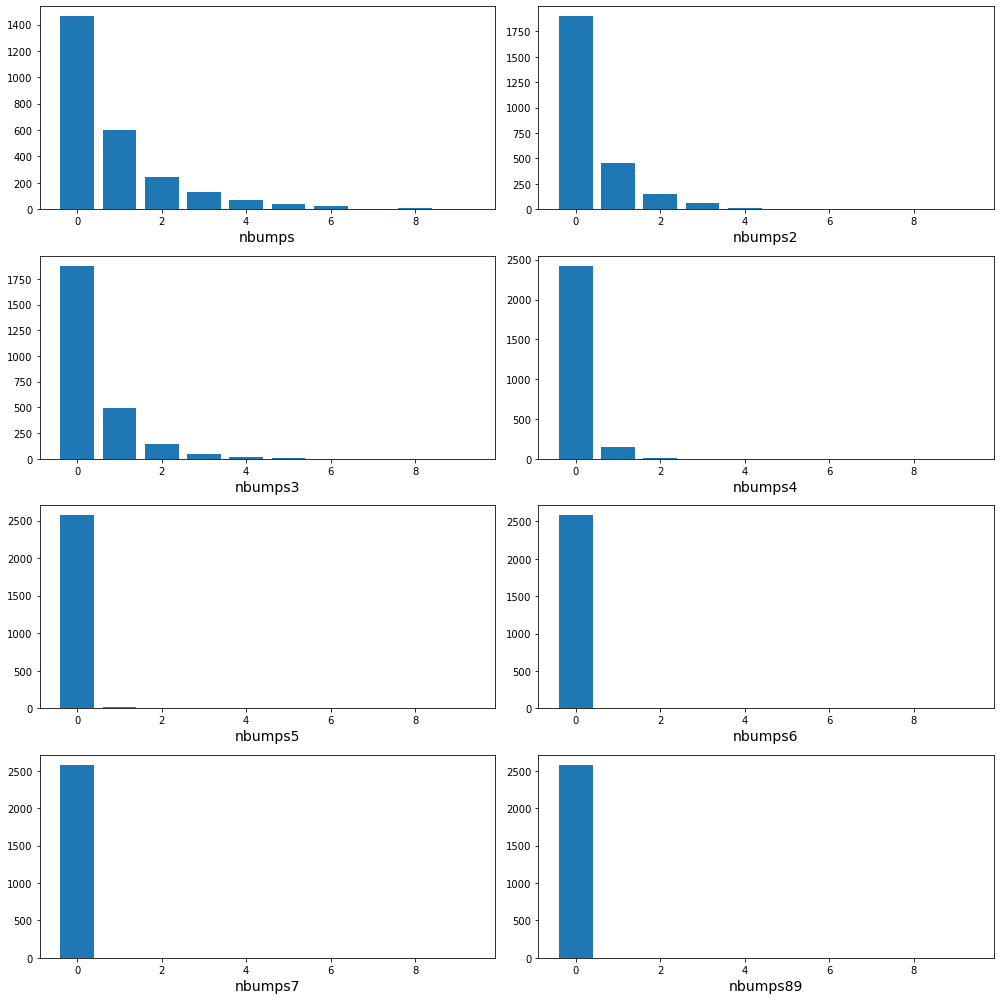

In [15]:
# making plots for discrete variables (nbumps, nbumps2, nbumps3, nbumps4, nbumps5, nbumps6, nbumps7, nbumps8)
fig, ax = plt.subplots(4,2, figsize=(14,14))

#creo una lista "cols", faccio loop for per cercare nella lista delle colonne le variabili che hanno nel nome la parola nbumps
cols = [col for col in df.columns if "nbumps" in col]

#line above is equal to this:
#cols = []
#for col in df.columns:
#    if "nbumps" in col:
#        cols.append(col)

#c è un index, partiamo da c=0 perchè rappresenta il primo elemento della lista cols, metto c+=1 nella lista così calcolo 
# i dati per tutte le colonne nbumps
c = 0
for i in range(4):
    for j in range(2):
        col = cols[c]
        ax[i,j].bar(list(range(10)),[(df[col]==v).sum() for v in range(10)])
        ax[i,j].set_xlabel(col, fontsize=14)
        c += 1
        
fig.tight_layout()        
plt.show()

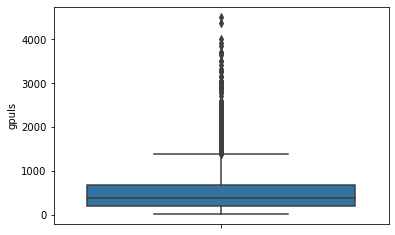

In [16]:
#Boxplots of non-categorical data for better understanding:
ax= sns.boxplot(y='gpuls', data=df)

In [17]:
# we display descriptive stats for all columns
df.describe()

,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
count,2.584000e+03,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.0,2584.0,2584.0,2584.000000,2584.000000,2584.000000
mean,9.024252e+04,538.579334,12.375774,4.508901,0.859520,0.393576,0.392802,0.067724,0.004644,0.0,0.0,0.0,4975.270898,4278.850619,0.065789
std,2.292005e+05,562.652536,80.319051,63.166556,1.364616,0.783772,0.769710,0.279059,0.068001,0.0,0.0,0.0,20450.833222,19357.454882,0.247962
min,1.000000e+02,2.000000,-96.000000,-96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,1.166000e+04,190.000000,-37.000000,-36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
50%,2.548500e+04,379.000000,-6.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
75%,5.283250e+04,669.000000,38.000000,30.250000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,2600.000000,2000.000000,0.000000
max,2.595650e+06,4518.000000,1245.000000,838.000000,9.000000,8.000000,7.000000,3.000000,1.000000,0.0,0.0,0.0,402000.000000,400000.000000,1.000000


Text(0.5, 0, 'Number Bumps per type')

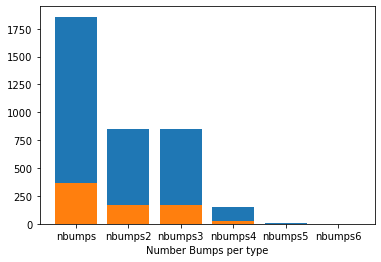

In [18]:
X=df.values
n = np.zeros(shape=6)
m = np.zeros(shape=6)

for a in range(0,5):
    for b in range(0,2582):   
        if X[b,18]==1:         
            m[a]=m[a]+X[b,8+a] 
for a in range(0,5):
    for b in range(0,2582):   
        if X[b,18]==0:         
            n[a]=n[a]+X[b,8+a]                 

plt.bar(["nbumps","nbumps2","nbumps3","nbumps4","nbumps5","nbumps6"],[n[0],n[1],n[2],n[3],n[4],n[5]])
plt.bar(["nbumps","nbumps2","nbumps3","nbumps4","nbumps5","nbumps6"],[m[0],m[1],m[2],m[3],m[4],m[5]])
plt.xlabel("Number Bumps per type")
#da notare come una parte considerevole dei bumps appartenga a shift di classe 1 nonostante essi siano solo 170/2584(arancioni)
#questo barplot però sovrappone due grafici quindi l'altezza delle barre non è la somma delle due clessi ma solo quella 0

Text(0.5, 0, 'Number Bumps per type')

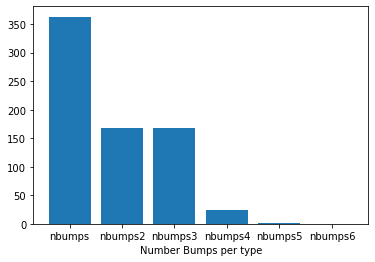

In [19]:
plt.bar(["nbumps","nbumps2","nbumps3","nbumps4","nbumps5","nbumps6"],[m[0],m[1],m[2],m[3],m[4],m[5]])
plt.xlabel("Number Bumps per type")

In [20]:
df.corr(method='pearson')

,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
genergy,1.000000,0.748020,0.048514,0.071554,0.220720,0.143587,0.191753,0.150589,-0.009863,NaN,NaN,NaN,0.080828,0.064405,0.128160
gpuls,0.748020,1.000000,0.293036,0.382906,0.300923,0.207390,0.225695,0.256547,0.049450,NaN,NaN,NaN,0.187350,0.164263,0.201042
gdenergy,0.048514,0.293036,1.000000,0.811944,0.030039,0.041246,-0.012189,0.036916,0.123229,NaN,NaN,NaN,0.105971,0.108572,0.002957
gdpuls,0.071554,0.382906,0.811944,1.000000,0.057996,0.051106,0.014735,0.066195,0.141044,NaN,NaN,NaN,0.143277,0.143646,0.021788
nbumps,0.220720,0.300923,0.030039,0.057996,1.000000,0.804978,0.803364,0.395052,0.069613,NaN,NaN,NaN,0.347852,0.273714,0.248144
nbumps2,0.143587,0.207390,0.041246,0.051106,0.804978,1.000000,0.350724,0.161296,-0.005251,NaN,NaN,NaN,0.124650,0.085032,0.201381
nbumps3,0.191753,0.225695,-0.012189,0.014735,0.803364,0.350724,1.000000,0.175301,0.046498,NaN,NaN,NaN,0.244083,0.176480,0.205327
nbumps4,0.150589,0.256547,0.036916,0.066195,0.395052,0.161296,0.175301,1.000000,-0.016580,NaN,NaN,NaN,0.489828,0.416483,0.075458
nbumps5,-0.009863,0.049450,0.123229,0.141044,0.069613,-0.005251,0.046498,-0.016580,1.000000,NaN,NaN,NaN,0.773605,0.808406,0.004834
nbumps6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


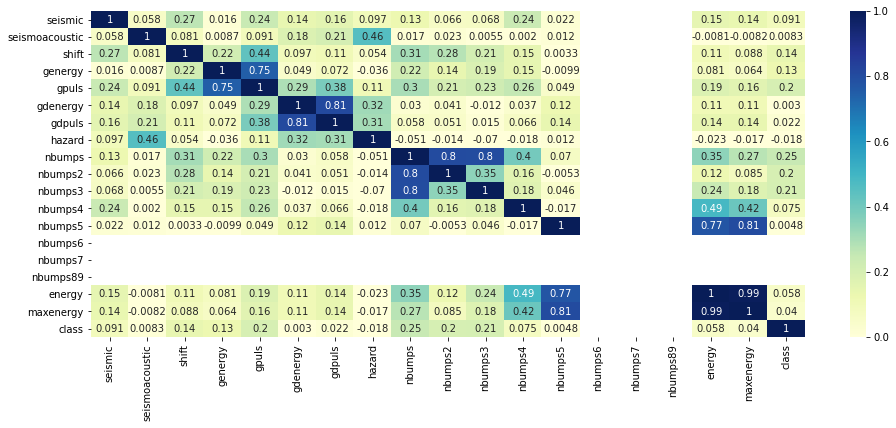

In [61]:
# Correlation Heatmap pearson
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(method='pearson'), vmin=0, vmax=1, annot=True, cmap='YlGnBu')

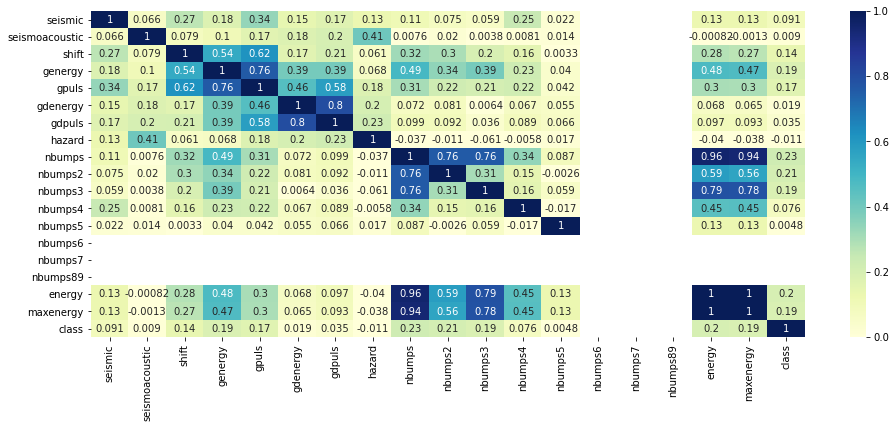

In [62]:
# Correlation Heatmap spearman
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(method='spearman'), vmin=0, vmax=1, annot=True, cmap='YlGnBu')

In [23]:
data_crosstab = pd.crosstab(df['seismoacoustic'], df['class'],rownames=['seismoacoustic'], colnames=['class'])

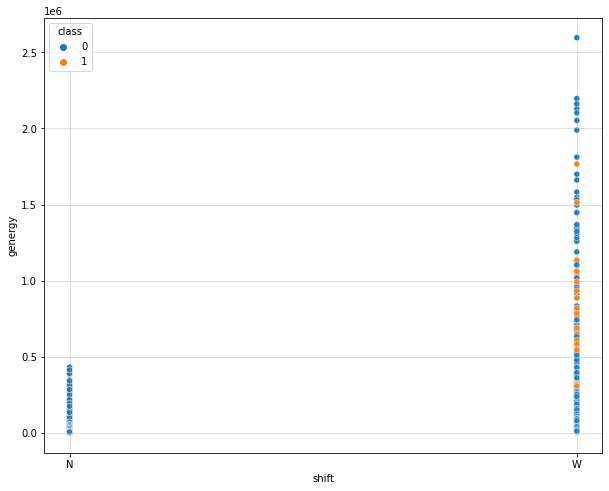

In [11]:
plt.figure(figsize=[10, 8])
sns.scatterplot(x='shift', y='genergy', hue='class', data=df)
plt.grid(alpha=0.5)

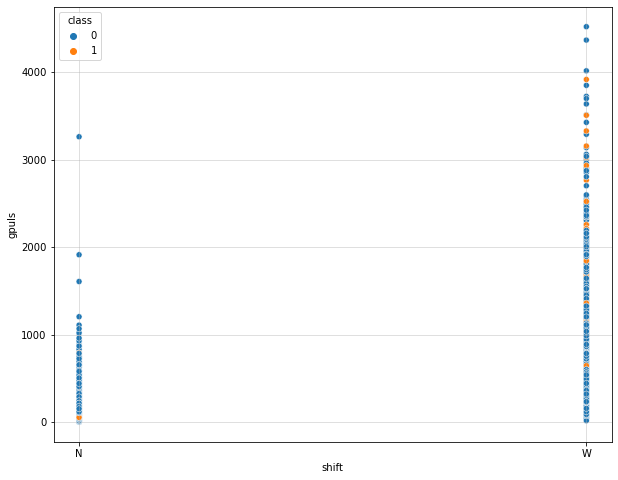

In [7]:
plt.figure(figsize=[10, 8])
sns.scatterplot(x='shift', y='gpuls', hue='class', data=df)
plt.grid(alpha=0.5)

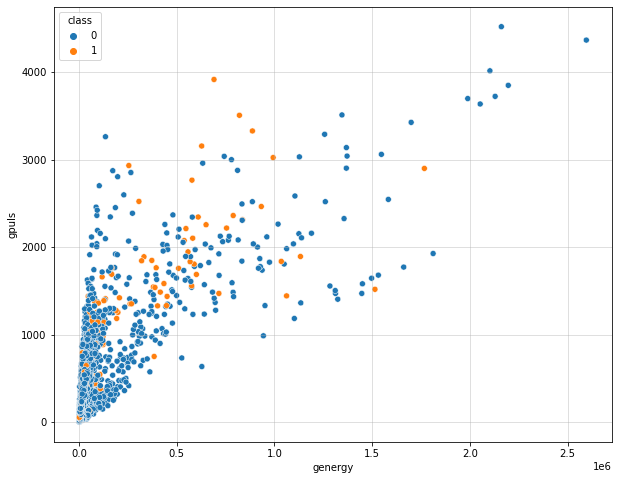

In [8]:
plt.figure(figsize=[10, 8])
sns.scatterplot(x='genergy', y='gpuls', hue='class', data=df)
plt.grid(alpha=0.5)

In [3]:
# Applying log transform

df['log_t_genergy'] = np.log(df['genergy'])
df['log_t_gpuls'] = np.log(df['gpuls'])

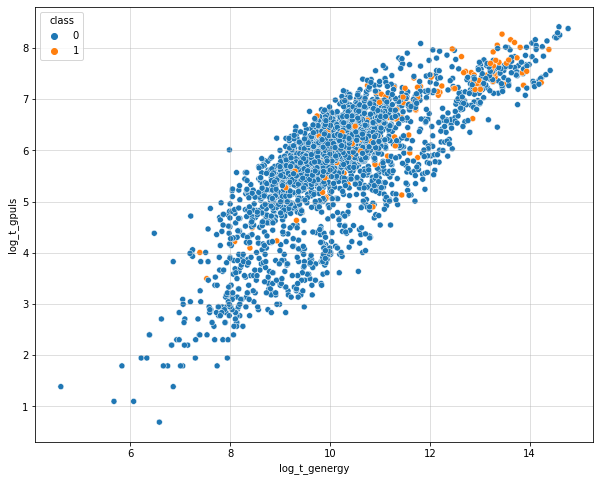

In [10]:
plt.figure(figsize=[10, 8])
sns.scatterplot(x='log_t_genergy', y='log_t_gpuls', hue='class', data=df)
plt.grid(alpha=0.5)

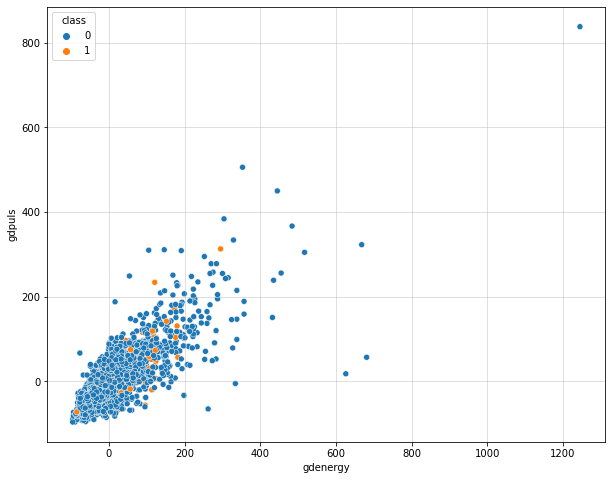

In [23]:
plt.figure(figsize=[10, 8])
sns.scatterplot(x='gdenergy', y='gdpuls', hue='class', data=df)
plt.grid(alpha=0.5)

In [20]:
# Applying log transform

df['log_t_gdpuls'] = np.log(df['gdpuls'])
df['log_t_gdenergy'] = np.log(df['gdenergy'])

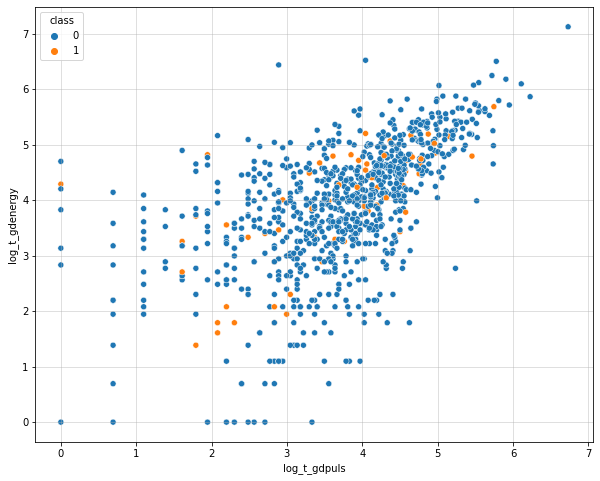

In [21]:
plt.figure(figsize=[10, 8])
sns.scatterplot(x='log_t_gdpuls', y='log_t_gdenergy', hue='class', data=df)
plt.grid(alpha=0.5)

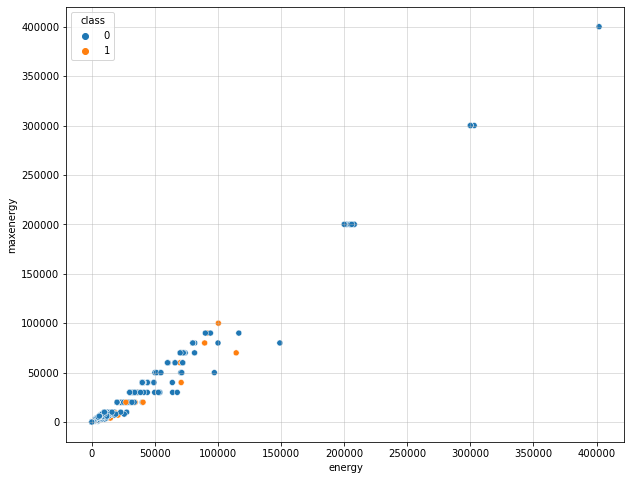

In [12]:
plt.figure(figsize=[10, 8])
sns.scatterplot(x='energy', y='maxenergy', hue='class', data=df)
plt.grid(alpha=0.5)

In [16]:
# Applying log transform

df['log_t_maxenergy'] = np.log(df['maxenergy'])
df['log_t_energy'] = np.log(df['energy'])

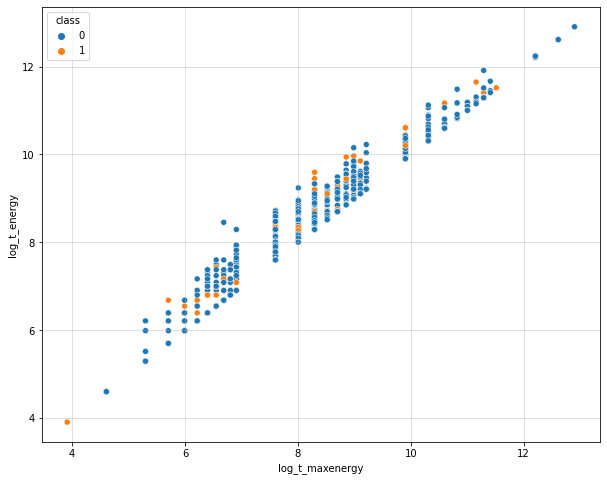

In [17]:
plt.figure(figsize=[10, 8])
sns.scatterplot(x='log_t_maxenergy', y='log_t_energy', hue='class', data=df)
plt.grid(alpha=0.5)

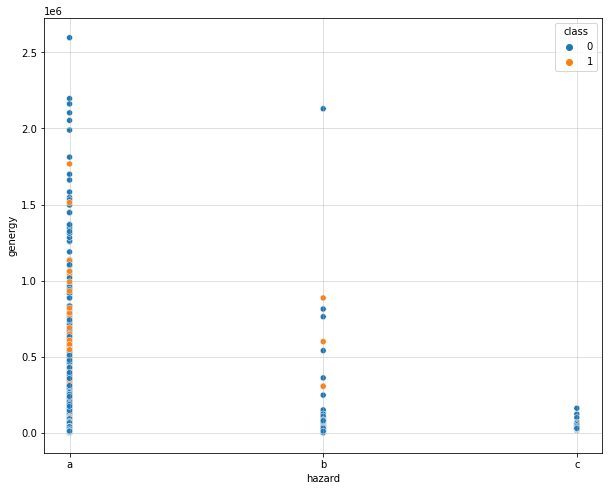

In [22]:
plt.figure(figsize=[10, 8])
sns.scatterplot(x='hazard', y='genergy', hue='class', data=df)
plt.grid(alpha=0.5)